# 1.IMPORTING LIBRARIES

In [ ]:
# importing libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from sklearn import metrics
from keras.preprocessing import image
import matplotlib.pyplot as plt

# 2.IMAGE PROCESSING

dataset link : https://www.kaggle.com/code/nurulaminapon/endoscopy-image-processing/data

data size 1.52 GB

In [4]:
train_set = 'data/train'
val_set = 'data/val'
test_set = 'data/test'

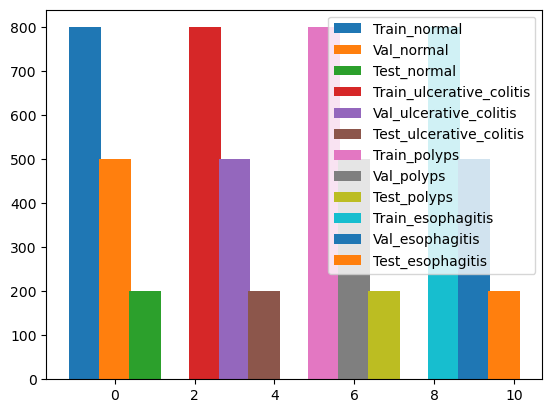

In [40]:
# getting the number of images in each set
import os
lst = os.listdir(train_set)
for i in lst:
    plt.bar(3*lst.index(i)-0.75, len(os.listdir(train_set + '/' + i)), label = 'Train'+str(i)[1:])
    plt.bar(3*lst.index(i), len(os.listdir(val_set + '/' + i)), label = 'Val'+str(i)[1:])
    plt.bar(3*lst.index(i)+0.75, len(os.listdir(test_set + '/' + i)), label = 'Test'+str(i)[1:])
plt.legend()
plt.show()

so, we have balanced data set where training data set has 3200 images and test data set has 800 images and validation data has 2000 images. we have 4 classes in our data set. and each class has 800 images.

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [6]:
# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size=(224, 224),  # chosen image size by model
    batch_size=16,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False)

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# 3.MODEL CREATION

we are using the InceptionV3 model for this application. Inception v3 is an image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset.

input_shape=(224,224,3) => this is the input dimensions of the model. So, that means we are using RGB imgaes

we add GaussianNoise layer to the model to reduce the overfitting of the model.

In [2]:
base_model = tf.keras.applications.inception_v3.InceptionV3( weights='imagenet', input_shape=(224, 224, 3), include_top=False)

# Freeze the IncpetionV3 layers from training
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax')) # 4 classes by softmax activation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 batch_normalization_94 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 gaussian_noise (GaussianNoi  (None, 512)              0         
 se)                                                             
                                                                 
 dropout (Dropout)           (None, 512)               0

# 4.MODEL COMPILATION & TRAINING

In [44]:
# here using adam optimizer beacuse it is the best optimizer for image classification
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [45]:
history = model.fit( train_generator, steps_per_epoch=100, epochs=40, validation_data=validation_generator)

Epoch 1/40
100/100 [==============================] - 75s 713ms/step - loss: 0.9227 - accuracy: 0.6950 - precision: 0.7263 - recall: 0.6519 - auc: 0.8874 - val_loss: 1.5151 - val_accuracy: 0.5260 - val_precision: 0.5533 - val_recall: 0.5010 - val_auc: 0.7932
Epoch 2/40
100/100 [==============================] - 62s 625ms/step - loss: 0.6221 - accuracy: 0.7513 - precision: 0.7886 - recall: 0.7156 - auc: 0.9347 - val_loss: 0.8821 - val_accuracy: 0.6955 - val_precision: 0.7143 - val_recall: 0.6700 - val_auc: 0.8965
Epoch 3/40
100/100 [==============================] - 61s 616ms/step - loss: 0.5647 - accuracy: 0.7975 - precision: 0.8180 - recall: 0.7613 - auc: 0.9456 - val_loss: 0.7545 - val_accuracy: 0.7145 - val_precision: 0.7393 - val_recall: 0.6935 - val_auc: 0.9149
Epoch 4/40
100/100 [==============================] - 62s 626ms/step - loss: 0.5328 - accuracy: 0.7919 - precision: 0.8159 - recall: 0.7675 - auc: 0.9510 - val_loss: 0.7625 - val_accuracy: 0.7085 - val_precision: 0.7267 - v

# 5.MODEL SAVING & EVALUATION

In [46]:
model.save('InceptionV3.h5') # saving the model

In [47]:
model.evaluate(train_generator)


200/200 [==============================] - 57s 282ms/step - loss: 0.3095 - accuracy: 0.8969 - precision: 0.9090 - recall: 0.8803 - auc: 0.9844


[0.30945438146591187,
 0.8968750238418579,
 0.9090029001235962,
 0.8803125023841858,
 0.9843968152999878]

In [48]:
model.evaluate(validation_generator)


125/125 [==============================] - 40s 319ms/step - loss: 0.6141 - accuracy: 0.7635 - precision: 0.7883 - recall: 0.7355 - auc: 0.9389


[0.6140807867050171,
 0.7634999752044678,
 0.7883172631263733,
 0.7354999780654907,
 0.9388672709465027]

In [49]:
model.evaluate(test_generator)


50/50 [==============================] - 16s 310ms/step - loss: 0.5927 - accuracy: 0.7750 - precision: 0.7973 - recall: 0.7475 - auc: 0.9421


[0.5927278399467468,
 0.7749999761581421,
 0.7973333597183228,
 0.7475000023841858,
 0.9420938491821289]

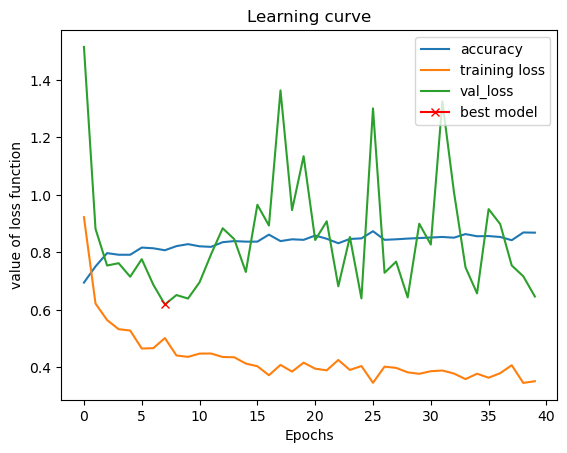

In [50]:
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(np.argmin(history.history["val_loss"]), np.min(
    history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of loss function")
plt.legend()
plt.show()

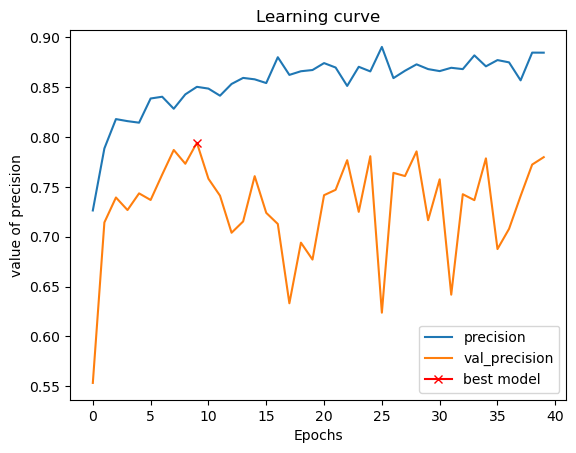

In [51]:
plt.title("Learning curve")
plt.plot(history.history["precision"], label="precision")
plt.plot(history.history["val_precision"], label="val_precision")
plt.plot( np.argmax(history.history["val_precision"]), np.max(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of precision")
plt.legend()
plt.show()

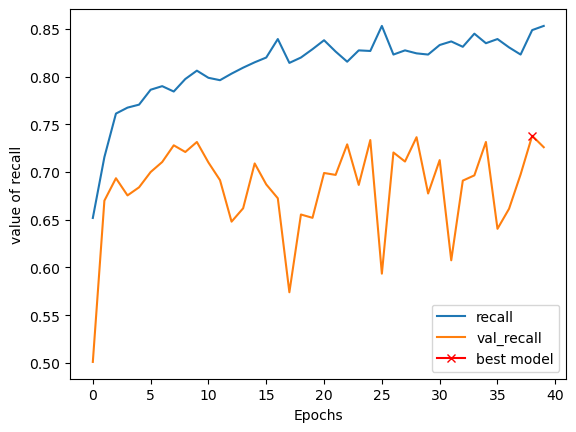

In [52]:
plt.plot(history.history["recall"], label="recall")
plt.plot(history.history["val_recall"], label="val_recall")
plt.plot( np.argmax(history.history["val_recall"]), np.max(history.history["val_recall"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of recall")
plt.legend()
plt.show()

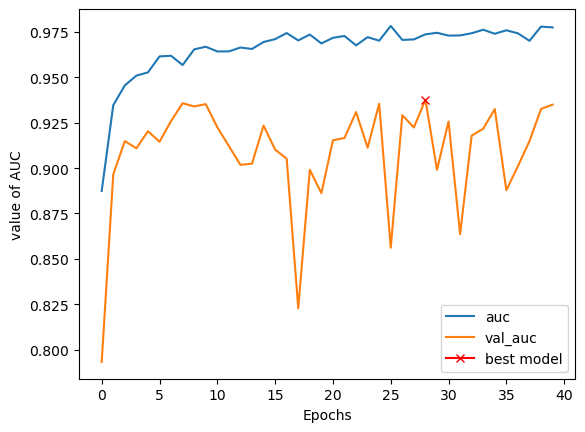

In [53]:
plt.plot(history.history["auc"], label="auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.plot( np.argmax(history.history["val_auc"]), np.max(history.history["val_auc"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of AUC")
plt.legend()
plt.show()

# 6.MODEL PREDICTION

In [55]:
# testing the model
img = image.load_img(
    'data/test/1_ulcerative_colitis/test_ulcer_ (2).jpg', target_size=(224, 224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)
ypred = model.predict(imaga)
print(ypred)
a = np.argmax(ypred, -1)
if a == 0:
    op = "Normal"
elif a == 1:
    op = "Ulcerative colitis"
elif a == 2:
    op = "Polyp"
else:
    op = "Esophagitis"
print(op)


1/1 [==============================] - 1s 1s/step
[[0.01611787 0.88049954 0.10236213 0.00102043]]
Ulcerative colitis


In [2]:
model = tf.keras.models.load_model('InceptionV3.h5') # loading the model

50/50 [==============================] - 43s 856ms/step


<Figure size 2000x2000 with 0 Axes>

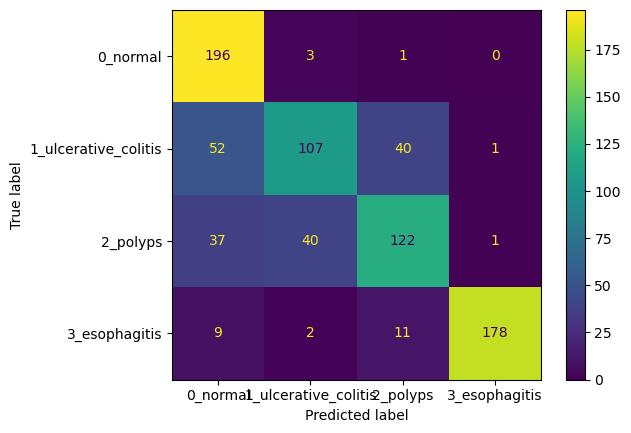

In [8]:
# ploting confusion matrix using sklearn
plt.figure(figsize=(20, 20))
cf_matrix = metrics.confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=test_generator.class_indices.keys())
cm_display.plot()
plt.show()

In [7]:
# calculation of precision, recall, f1-score, support
print(metrics.classification_report(test_generator.classes, np.argmax(model.predict(test_generator), axis=1), target_names=test_generator.class_indices.keys()))

50/50 [==============================] - 25s 319ms/step
                      precision    recall  f1-score   support

            0_normal       0.70      0.97      0.81       200
1_ulcerative_colitis       0.79      0.62      0.70       200
            2_polyps       0.75      0.66      0.70       200
       3_esophagitis       0.96      0.91      0.94       200

            accuracy                           0.79       800
           macro avg       0.80      0.79      0.79       800
        weighted avg       0.80      0.79      0.79       800

